In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from google.colab import files

In [2]:
uploaded = files.upload()  # Sube el archivo CSV
df = pd.read_csv("Real estate.csv")  # Cambia el nombre si es diferente

# Ver las primeras filas
df.head()

Saving Real estate.csv to Real estate.csv


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
# Verificar las columnas y tipos de datos
df.info()

# Eliminar columnas irrelevantes (si las hay)
df = df.drop(columns=['No'])

# Eliminar filas con valores nulos
df = df.dropna()

# Revisar el dataset después de la limpieza
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


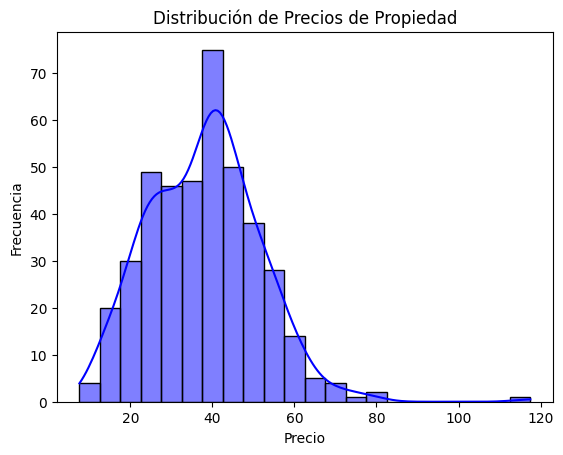

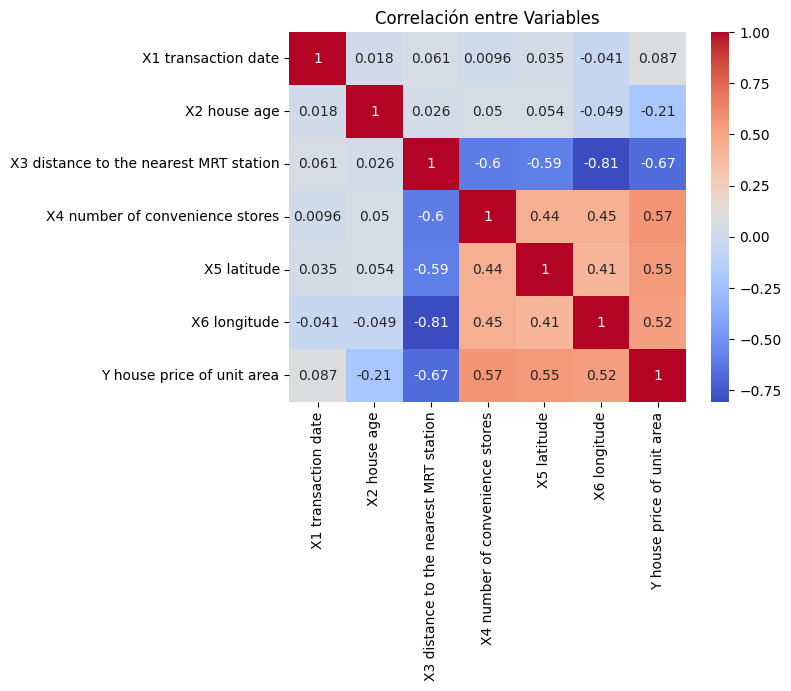

In [6]:
# Distribución de los precios de propiedad
sns.histplot(df['Y house price of unit area'], kde=True, color='blue')
plt.title("Distribución de Precios de Propiedad")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

# Ver correlación entre variables numéricas
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlación entre Variables")
plt.show()

In [10]:
# Variables predictoras (X) y variable objetivo (y)
X = df.drop(columns=['Y house price of unit area'])
y = df['Y house price of unit area']

# Convertir variables categóricas a variables dummy
X = pd.get_dummies(X, drop_first=True)

# Escalar las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# CREO UN MODELO DE PREDICCION LINEAL

In [11]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones con el modelo
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

RMSE: 7.314753524521662
R^2: 0.6810580555095946


# VISUALIZACION DE RESULTADOS

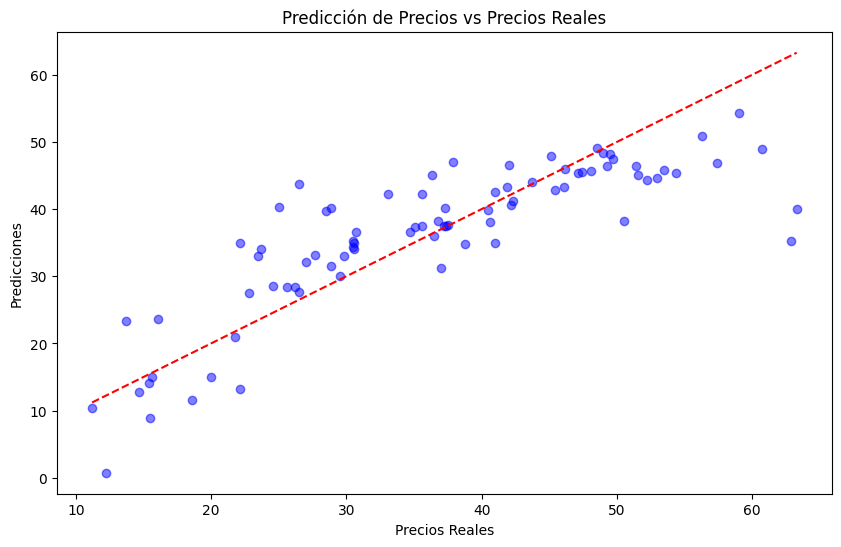

In [12]:
# Comparar los precios reales vs las predicciones
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Predicción de Precios vs Precios Reales")
plt.xlabel("Precios Reales")
plt.ylabel("Predicciones")
plt.show()


# Resultado Esperado:

  - Un R² alto (cerca de 1) significa que el modelo predice bien los precios.
  - Un RMSE bajo significa que la diferencia entre los valores reales y las predicciones es pequeña.